# Peak Integral - angepasster Ansatz

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Functions

In [2]:
# Berechne die Zeitwerte
def calculate_time_from_temperatures(df, column_name="Temp./°C", heating_rate_per_minute=20):
    df = df.reset_index()
    heating_rate_per_second = heating_rate_per_minute / 60
    start_temp = df[column_name].iloc[0]
    time_seconds = [(temp - start_temp) / heating_rate_per_second for temp in df[column_name]]
    return time_seconds

In [3]:
def area_calc(peak_dframe, measurement_dframe, series_name):
    areas = []
    for _, row in peak_dframe[peak_dframe["Series"] == series_name].iterrows():
        start_temp = row['Start_Temperature']
        end_temp = row['End_Temperature']
        try:
            start_index = measurement_dframe.index.get_loc(start_temp)
            end_index = measurement_dframe.index.get_loc(end_temp) + 1  # Inklusive des Endpunkts
        except KeyError:
            print(f"Temperature range {start_temp} to {end_temp} not found.")
            continue

        # gesamte Bereich unterhalb des Peaks
        y_values = measurement_dframe[series_name].iloc[start_index:end_index]
        time_values = measurement_dframe['Time_sec'].iloc[start_index:end_index]
        area_below_peak = np.trapz(y_values, x=time_values)
        print(area_below_peak)

        # Bereich zwischen der Linie von Start- und Endpunkt und dem Bereich unterhalb des Peaks
        line_values = np.linspace(y_values.iloc[0], y_values.iloc[-1], len(y_values))
        area_below_line = np.trapz(line_values, x=time_values)
        print(area_below_line)

        # Gesuchte Fläche (Integral bis zur Linie)
        total_area = area_below_peak - area_below_line
        areas.append(total_area)
        print(total_area)
        print("\n")
    peak_dframe.loc[peak_dframe["Series"] == series_name, "Area"] = areas
    return True

###  Workflow

In [4]:
df_peak = pd.read_csv("data/peaks.csv", sep=";")
df_peak

,Series,Peak_Temperature,Start_Temperature,End_Temperature,Area
0,C1_S3,29.34483,18.34483,38.34483,-0.466610
1,C1_S3,97.34483,80.34483,106.34483,-0.572195
2,C1_S5,55.34483,45.34483,62.34483,0.403585
3,C1_S5,110.34483,91.34483,120.34483,0.515150
4,C2_S5,55.34483,41.34483,62.34483,0.446510
5,C2_S5,110.34483,87.34483,120.34483,0.630190
6,C2_S5,55.34483,41.34483,62.34483,0.446510
7,C2_S5,110.34483,87.34483,120.34483,0.630190


In [5]:
df_measurements = pd.read_csv("data/measurements.csv", sep=";", index_col="Temp./°C")
df_measurements

,C1_S1,C1_S3,C1_S5,C2_S1,C2_S3,C2_S5,C3_S1,C3_S3,C3_S5,C4_S1,...,C7_S5,C8_S1,C8_S3,C8_S5,C9_S1,C9_S3,C9_S5,C10_S1,C10_S3,C10_S5
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-27.65517,NaN,-0.28629,0.29632,NaN,-0.26812,0.27996,NaN,-0.25642,0.29215,NaN,...,0.28233,NaN,-0.29654,0.30878,NaN,-0.31436,0.31452,NaN,-0.29660,0.30051
-26.65517,NaN,-0.28742,0.29556,NaN,-0.26919,0.27943,NaN,-0.27181,0.29010,NaN,...,0.28116,NaN,-0.30165,0.30859,NaN,-0.31737,0.31461,NaN,-0.29747,0.30048
-25.65517,NaN,-0.28762,0.29407,NaN,-0.26998,0.27876,NaN,-0.28293,0.28855,NaN,...,0.28004,NaN,-0.30235,0.30855,NaN,-0.31748,0.31490,NaN,-0.29811,0.30045
-24.65517,NaN,-0.28922,0.29382,NaN,-0.27078,0.27855,NaN,-0.28939,0.28784,NaN,...,0.27953,NaN,-0.30312,0.30881,NaN,-0.31861,0.31546,NaN,-0.29897,0.30092
-23.65517,NaN,-0.28983,0.29302,NaN,-0.27162,0.27881,NaN,-0.29127,0.28790,NaN,...,0.27936,NaN,-0.30380,0.30936,NaN,-0.31938,0.31627,NaN,-0.29999,0.30178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270.34483,0.48226,-0.42968,0.45576,0.44551,-0.42925,0.41479,0.47739,-0.42917,0.44651,0.43974,...,0.39977,0.49512,-0.48689,0.46568,0.53158,-0.47484,0.50892,0.50868,-0.45957,0.47928
271.34483,0.48173,-0.43157,0.45590,0.44583,-0.43115,0.41533,0.47813,-0.43063,0.44700,0.43981,...,0.40013,0.49566,-0.48951,0.46614,0.53222,-0.47693,0.50965,0.50922,-0.46179,0.47999
272.34483,0.48077,-0.43195,0.45604,0.44602,-0.43184,0.41592,0.47872,-0.43102,0.44750,0.44043,...,0.40046,0.49669,-0.49016,0.46663,0.53283,-0.47751,0.51039,0.50983,-0.46230,0.48067


In [6]:
# Füge die Zeitwerte dem DataFrame hinzu
df_measurements['Time_sec'] = calculate_time_from_temperatures(df_measurements)
df_measurements.iloc[:, [0, 1, 2, -2, -1]]

,C1_S1,C1_S3,C1_S5,C10_S5,Time_sec
Temp./°C,,,,,
-27.65517,NaN,-0.28629,0.29632,0.30051,0.0
-26.65517,NaN,-0.28742,0.29556,0.30048,3.0
-25.65517,NaN,-0.28762,0.29407,0.30045,6.0
-24.65517,NaN,-0.28922,0.29382,0.30092,9.0
-23.65517,NaN,-0.28983,0.29302,0.30178,12.0
...,...,...,...,...,...
270.34483,0.48226,-0.42968,0.45576,0.47928,894.0
271.34483,0.48173,-0.43157,0.45590,0.47999,897.0
272.34483,0.48077,-0.43195,0.45604,0.48067,900.0


In [7]:
area_calc(df_peak,df_measurements, "C1_S5")

19.339350000000003
18.12438
1.2149700000000045


34.546634999999995
33.001275
1.5453599999999952




True

In [8]:
df_peak

,Series,Peak_Temperature,Start_Temperature,End_Temperature,Area
0,C1_S3,29.34483,18.34483,38.34483,-0.466610
1,C1_S3,97.34483,80.34483,106.34483,-0.572195
2,C1_S5,55.34483,45.34483,62.34483,1.214970
3,C1_S5,110.34483,91.34483,120.34483,1.545360
4,C2_S5,55.34483,41.34483,62.34483,0.446510
5,C2_S5,110.34483,87.34483,120.34483,0.630190
6,C2_S5,55.34483,41.34483,62.34483,0.446510
7,C2_S5,110.34483,87.34483,120.34483,0.630190


In [9]:
df_measurements

,C1_S1,C1_S3,C1_S5,C2_S1,C2_S3,C2_S5,C3_S1,C3_S3,C3_S5,C4_S1,...,C8_S1,C8_S3,C8_S5,C9_S1,C9_S3,C9_S5,C10_S1,C10_S3,C10_S5,Time_sec
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-27.65517,NaN,-0.28629,0.29632,NaN,-0.26812,0.27996,NaN,-0.25642,0.29215,NaN,...,NaN,-0.29654,0.30878,NaN,-0.31436,0.31452,NaN,-0.29660,0.30051,0.0
-26.65517,NaN,-0.28742,0.29556,NaN,-0.26919,0.27943,NaN,-0.27181,0.29010,NaN,...,NaN,-0.30165,0.30859,NaN,-0.31737,0.31461,NaN,-0.29747,0.30048,3.0
-25.65517,NaN,-0.28762,0.29407,NaN,-0.26998,0.27876,NaN,-0.28293,0.28855,NaN,...,NaN,-0.30235,0.30855,NaN,-0.31748,0.31490,NaN,-0.29811,0.30045,6.0
-24.65517,NaN,-0.28922,0.29382,NaN,-0.27078,0.27855,NaN,-0.28939,0.28784,NaN,...,NaN,-0.30312,0.30881,NaN,-0.31861,0.31546,NaN,-0.29897,0.30092,9.0
-23.65517,NaN,-0.28983,0.29302,NaN,-0.27162,0.27881,NaN,-0.29127,0.28790,NaN,...,NaN,-0.30380,0.30936,NaN,-0.31938,0.31627,NaN,-0.29999,0.30178,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270.34483,0.48226,-0.42968,0.45576,0.44551,-0.42925,0.41479,0.47739,-0.42917,0.44651,0.43974,...,0.49512,-0.48689,0.46568,0.53158,-0.47484,0.50892,0.50868,-0.45957,0.47928,894.0
271.34483,0.48173,-0.43157,0.45590,0.44583,-0.43115,0.41533,0.47813,-0.43063,0.44700,0.43981,...,0.49566,-0.48951,0.46614,0.53222,-0.47693,0.50965,0.50922,-0.46179,0.47999,897.0
272.34483,0.48077,-0.43195,0.45604,0.44602,-0.43184,0.41592,0.47872,-0.43102,0.44750,0.44043,...,0.49669,-0.49016,0.46663,0.53283,-0.47751,0.51039,0.50983,-0.46230,0.48067,900.0


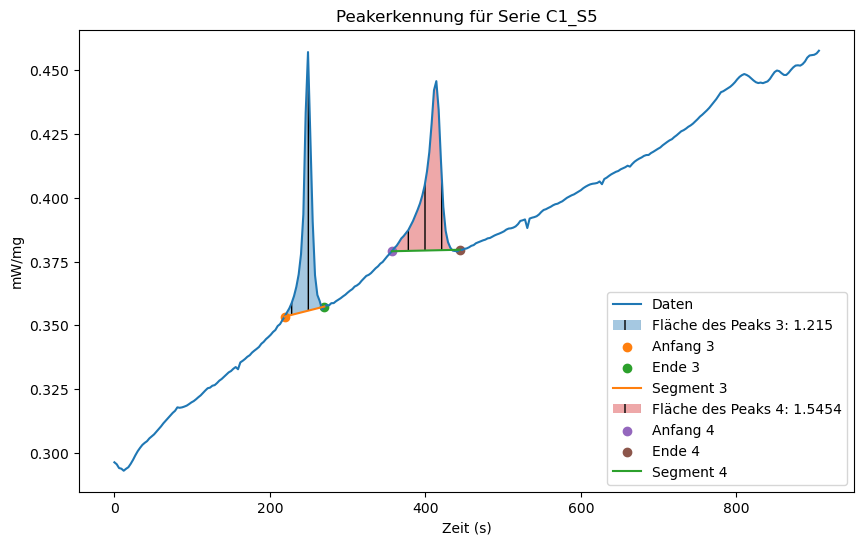

In [10]:
df = df_measurements

# Angenommen, df ist dein Hauptdaten-DataFrame und df_peak enthält die Peak-Daten
series = "C1_S5"
plt.figure(figsize=(10, 6))
plt.plot(df['Time_sec'], df[series], label="Daten")

for i, row in df_peak[df_peak["Series"] == series].iterrows():
    start_index = df.index.get_loc(row['Start_Temperature'])
    end_index = df.index.get_loc(row['End_Temperature']) + 1  # Inklusive des Endpunkts

    # Zeitwerte und Temperaturwerte extrahieren
    this_x = df['Time_sec'].iloc[start_index:end_index]
    this_y = df[series].iloc[start_index:end_index]

    # Bereich unterhalb des Peaks
    area_below_peak = np.trapz(this_y, x=this_x)

    # Bereich zwischen der Linie von Start- und Endpunkt und dem Bereich unterhalb des Peaks
    line_values = np.linspace(this_y.iloc[0], this_y.iloc[-1], len(this_y))
    area_below_line = np.trapz(line_values, x=this_x)
    total_area = area_below_peak - area_below_line

    plt.fill_between(this_x, this_y, line_values, alpha=0.4, label=f"Fläche des Peaks {i+1}: {round(total_area, 4)}", hatch='|')
    plt.scatter(df['Time_sec'].iloc[start_index], this_y.iloc[0], label=f"Anfang {i+1}")
    plt.scatter(df['Time_sec'].iloc[end_index - 1], this_y.iloc[-1], label=f"Ende {i+1}")
    plt.plot([this_x.iloc[0], this_x.iloc[-1]], [this_y.iloc[0], this_y.iloc[-1]], label=f"Segment {i+1}")

plt.title(f"Peakerkennung für Serie {series}")
plt.xlabel("Zeit (s)")
plt.ylabel("mW/mg")
plt.legend()
plt.show()


## mW-Umrechnung

In [11]:
df_measurements

,C1_S1,C1_S3,C1_S5,C2_S1,C2_S3,C2_S5,C3_S1,C3_S3,C3_S5,C4_S1,...,C8_S1,C8_S3,C8_S5,C9_S1,C9_S3,C9_S5,C10_S1,C10_S3,C10_S5,Time_sec
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-27.65517,NaN,-0.28629,0.29632,NaN,-0.26812,0.27996,NaN,-0.25642,0.29215,NaN,...,NaN,-0.29654,0.30878,NaN,-0.31436,0.31452,NaN,-0.29660,0.30051,0.0
-26.65517,NaN,-0.28742,0.29556,NaN,-0.26919,0.27943,NaN,-0.27181,0.29010,NaN,...,NaN,-0.30165,0.30859,NaN,-0.31737,0.31461,NaN,-0.29747,0.30048,3.0
-25.65517,NaN,-0.28762,0.29407,NaN,-0.26998,0.27876,NaN,-0.28293,0.28855,NaN,...,NaN,-0.30235,0.30855,NaN,-0.31748,0.31490,NaN,-0.29811,0.30045,6.0
-24.65517,NaN,-0.28922,0.29382,NaN,-0.27078,0.27855,NaN,-0.28939,0.28784,NaN,...,NaN,-0.30312,0.30881,NaN,-0.31861,0.31546,NaN,-0.29897,0.30092,9.0
-23.65517,NaN,-0.28983,0.29302,NaN,-0.27162,0.27881,NaN,-0.29127,0.28790,NaN,...,NaN,-0.30380,0.30936,NaN,-0.31938,0.31627,NaN,-0.29999,0.30178,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270.34483,0.48226,-0.42968,0.45576,0.44551,-0.42925,0.41479,0.47739,-0.42917,0.44651,0.43974,...,0.49512,-0.48689,0.46568,0.53158,-0.47484,0.50892,0.50868,-0.45957,0.47928,894.0
271.34483,0.48173,-0.43157,0.45590,0.44583,-0.43115,0.41533,0.47813,-0.43063,0.44700,0.43981,...,0.49566,-0.48951,0.46614,0.53222,-0.47693,0.50965,0.50922,-0.46179,0.47999,897.0
272.34483,0.48077,-0.43195,0.45604,0.44602,-0.43184,0.41592,0.47872,-0.43102,0.44750,0.44043,...,0.49669,-0.49016,0.46663,0.53283,-0.47751,0.51039,0.50983,-0.46230,0.48067,900.0


In [12]:
info_df = pd.read_csv("data/relevant_info.csv", sep=";")
info_df.head()

,file,identity,sample,sample mass_mg,range,segment
0,CSEW1.ngb-sdg,C1,C1,20.76,20°C/20.0(K/min)/300°C,S1/5
1,CSEW1.ngb-sdg,C1,C1,20.76,300°C/20.0(K/min)/-50°C,S3/5
2,CSEW1.ngb-sdg,C1,C1,20.76,-50°C/20.0(K/min)/300°C,S5/5
3,CSEW2.ngb-sdg,C2,C2,20.44,20°C/20.0(K/min)/300°C,S1/5
4,CSEW2.ngb-sdg,C2,C2,20.44,300°C/20.0(K/min)/-50°C,S3/5


In [13]:
measurements_df = df_measurements
for column in measurements_df.columns[:-1]:
    sample, _ = column.split('_')  # Sample und Segment ID extrahieren
    mass_mg_value = info_df.loc[info_df["sample"] == sample, "sample mass_mg"].iloc[0]
    measurements_df.loc[:, column] *= mass_mg_value

In [14]:
measurements_df

,C1_S1,C1_S3,C1_S5,C2_S1,C2_S3,C2_S5,C3_S1,C3_S3,C3_S5,C4_S1,...,C8_S1,C8_S3,C8_S5,C9_S1,C9_S3,C9_S5,C10_S1,C10_S3,C10_S5,Time_sec
Temp./°C,,,,,,,,,,,,,,,,,,,,,
-27.65517,NaN,-5.943380,6.151603,NaN,-5.480373,5.722382,NaN,-5.184812,5.907273,NaN,...,NaN,-5.969350,6.215741,NaN,-6.268338,6.271529,NaN,-6.261226,6.343766,0.0
-26.65517,NaN,-5.966839,6.135826,NaN,-5.502244,5.711549,NaN,-5.495998,5.865822,NaN,...,NaN,-6.072214,6.211917,NaN,-6.328358,6.273323,NaN,-6.279592,6.343133,3.0
-25.65517,NaN,-5.970991,6.104893,NaN,-5.518391,5.697854,NaN,-5.720845,5.834481,NaN,...,NaN,-6.086305,6.211111,NaN,-6.330551,6.279106,NaN,-6.293102,6.342499,6.0
-24.65517,NaN,-6.004207,6.099703,NaN,-5.534743,5.693562,NaN,-5.851466,5.820125,NaN,...,NaN,-6.101806,6.216345,NaN,-6.353083,6.290272,NaN,-6.311257,6.352421,9.0
-23.65517,NaN,-6.016871,6.083095,NaN,-5.551913,5.698876,NaN,-5.889479,5.821338,NaN,...,NaN,-6.115494,6.227417,NaN,-6.368437,6.306424,NaN,-6.332789,6.370576,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
270.34483,10.011718,-8.920157,9.461578,9.106224,-8.773870,8.478308,9.652826,-8.677817,9.028432,9.089426,...,9.966766,-9.801096,9.374138,10.599705,-9.468310,10.147865,10.738235,-9.701523,10.117601,894.0
271.34483,10.000715,-8.959393,9.464484,9.112765,-8.812706,8.489345,9.667789,-8.707339,9.038340,9.090873,...,9.977636,-9.853836,9.383398,10.612467,-9.509984,10.162421,10.749634,-9.748387,10.132589,897.0
272.34483,9.980785,-8.967282,9.467390,9.116649,-8.826810,8.501405,9.679718,-8.715224,9.048450,9.103688,...,9.998370,-9.866921,9.393262,10.624630,-9.521549,10.177177,10.762511,-9.759153,10.146944,900.0


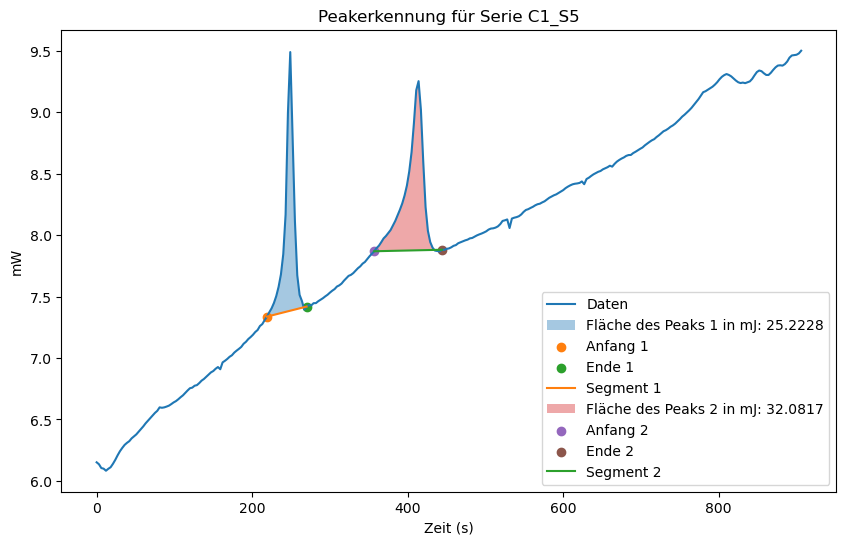

In [15]:
df = df_measurements

# Angenommen, df ist dein Hauptdaten-DataFrame und df_peak enthält die Peak-Daten
series = "C1_S5"
plt.figure(figsize=(10, 6))
plt.plot(df['Time_sec'], df[series], label="Daten")

for i, row in df_peak[df_peak["Series"] == series].iterrows():
    start_index = df.index.get_loc(row['Start_Temperature'])
    end_index = df.index.get_loc(row['End_Temperature']) + 1  # Inklusive des Endpunkts

    # Zeitwerte und Temperaturwerte extrahieren
    this_x = df['Time_sec'].iloc[start_index:end_index]
    this_y = df[series].iloc[start_index:end_index]

    # Bereich unterhalb des Peaks
    area_below_peak = np.trapz(this_y, x=this_x)

    # Bereich zwischen der Linie von Start- und Endpunkt und dem Bereich unterhalb des Peaks
    line_values = np.linspace(this_y.iloc[0], this_y.iloc[-1], len(this_y))
    area_below_line = np.trapz(line_values, x=this_x)
    total_area = area_below_peak - area_below_line

    plt.fill_between(this_x, this_y, line_values, alpha=0.4, label=f"Fläche des Peaks {i-1} in mJ: {round(total_area, 4)}")
    plt.scatter(df['Time_sec'].iloc[start_index], this_y.iloc[0], label=f"Anfang {i-1}")
    plt.scatter(df['Time_sec'].iloc[end_index - 1], this_y.iloc[-1], label=f"Ende {i-1}")
    plt.plot([this_x.iloc[0], this_x.iloc[-1]], [this_y.iloc[0], this_y.iloc[-1]], label=f"Segment {i-1}")

plt.title(f"Peakerkennung für Serie {series}")
plt.xlabel("Zeit (s)")
plt.ylabel("mW")
plt.legend()
plt.show()